# Гладышев ВВ Практическое задание к уроку 4

## Тема “Обучение без учителя”

In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

### Задание 1

In [39]:
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.DataFrame(boston['target'], columns=['price'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [29]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

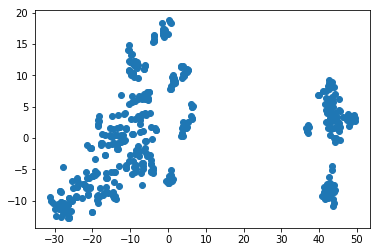

In [30]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2

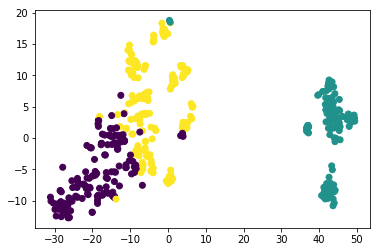

In [34]:
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state = 42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [40]:
print('Кластер 0: {}'.format(y_train.loc[labels_train == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_train.loc[labels_train == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_train.loc[labels_train == 2, 'price'].mean()))

Кластер 0: 26.836879432624105
Кластер 1: 16.187378640776704
Кластер 2: 23.490624999999994


In [36]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.0965229078014185
Кластер 1: 12.927381747572817
Кластер 2: 0.7059768750000002


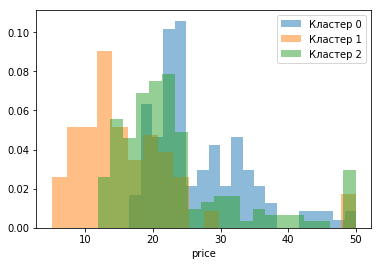

In [50]:
plt.hist(y_train.loc[labels_train == 0, 'price'], bins=20, density=True, alpha=0.5)
plt.hist(y_train.loc[labels_train == 1, 'price'], bins=20, density=True, alpha=0.5)
plt.hist(y_train.loc[labels_train == 2, 'price'], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('price')

plt.show()

### Задание 3

In [41]:
labels_test = kmeans.fit_predict(X_test_scaled)

In [42]:
print('Кластер 0: {}'.format(y_test.loc[labels_test == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_test.loc[labels_test == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_test.loc[labels_test == 2, 'price'].mean()))

Кластер 0: 26.741463414634143
Кластер 1: 16.816129032258065
Кластер 2: 19.136666666666663


In [43]:
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0: 0.12016536585365852
Кластер 1: 11.389174193548389
Кластер 2: 0.4121796666666666
